                            open   high  close    low  hour_return  \
date                                                                 
2021-10-27 20:00:00+07:00  186.0  186.6  185.6  185.2    -0.215054   
2021-10-27 19:00:00+07:00  184.5  188.0  186.0  182.6     0.813008   
2021-10-27 18:00:00+07:00  182.7  186.5  184.5  182.2     0.985222   
2021-10-27 17:00:00+07:00  184.0  184.4  182.8  180.0    -0.652174   
2021-10-27 16:00:00+07:00  184.5  185.9  184.1  180.4    -0.216802   
...                          ...    ...    ...    ...          ...   
2021-09-27 23:00:00+07:00  150.2  150.3  148.8  147.7    -0.932091   
2021-09-27 22:00:00+07:00  149.7  150.2  150.1  148.9     0.267201   
2021-09-27 21:00:00+07:00  151.1  153.3  149.7  149.0    -0.926539   
2021-09-27 20:00:00+07:00  151.9  152.5  151.1  150.8    -0.526662   
2021-09-27 19:00:00+07:00  152.7  153.1  151.9  151.1    -0.523903   

                                  day  hour  type  
date                                 

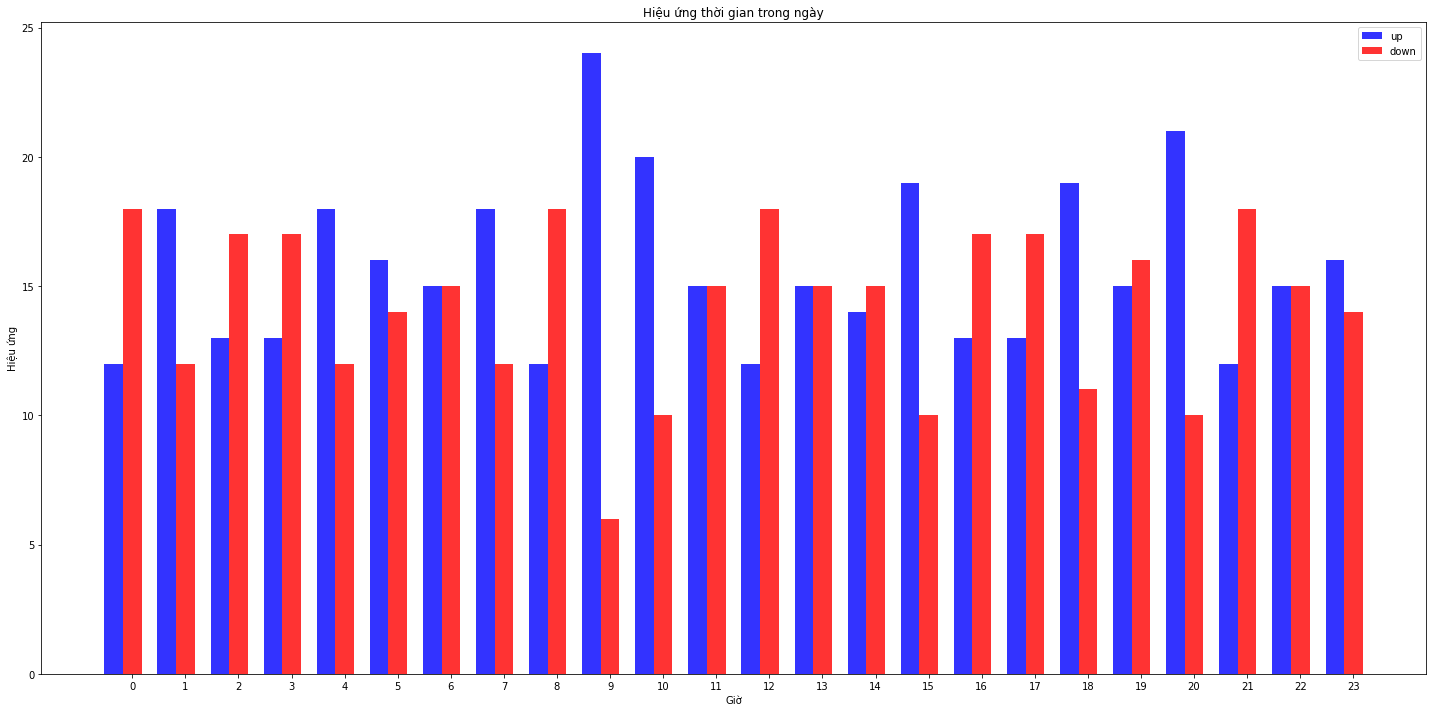

In [115]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*30, "DESC")

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)

# data_prices = data_prices[data_prices['hour'] == 10]

# number_up = len(data_prices[data_prices['type'] == 'up'])
# number_down = len(data_prices[data_prices['type'] == 'down'])

# print(number_up)
# print(number_down)

print(data_prices)

bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


# x = data_prices[data_prices['hour'] == 13]


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]
    # print(f"Giờ {i}")
    # print("________________________________")
    # print(data_prices_x[data_prices_x['type'] == 'up']['hour_return'].describe())
    # print("+++")
    # print(data_prices_x[data_prices_x['type'] == 'down']['hour_return'].describe())
    # data_prices[data_prices['hour'] == i]['hour_return'].plot(figsize=[20,10], legend=True, linestyle='--', marker='o')


    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()






Giờ 7
________________________________
count    16.000000
mean      0.719549
std       0.741227
min       0.106440
25%       0.319885
50%       0.367545
75%       0.838862
max       2.963362
Name: hour_return, dtype: float64
+++
count    14.000000
mean     -0.407438
std       0.244832
min      -0.932091
25%      -0.548253
50%      -0.454899
75%      -0.169936
max      -0.057274
Name: hour_return, dtype: float64


<AxesSubplot:xlabel='date'>

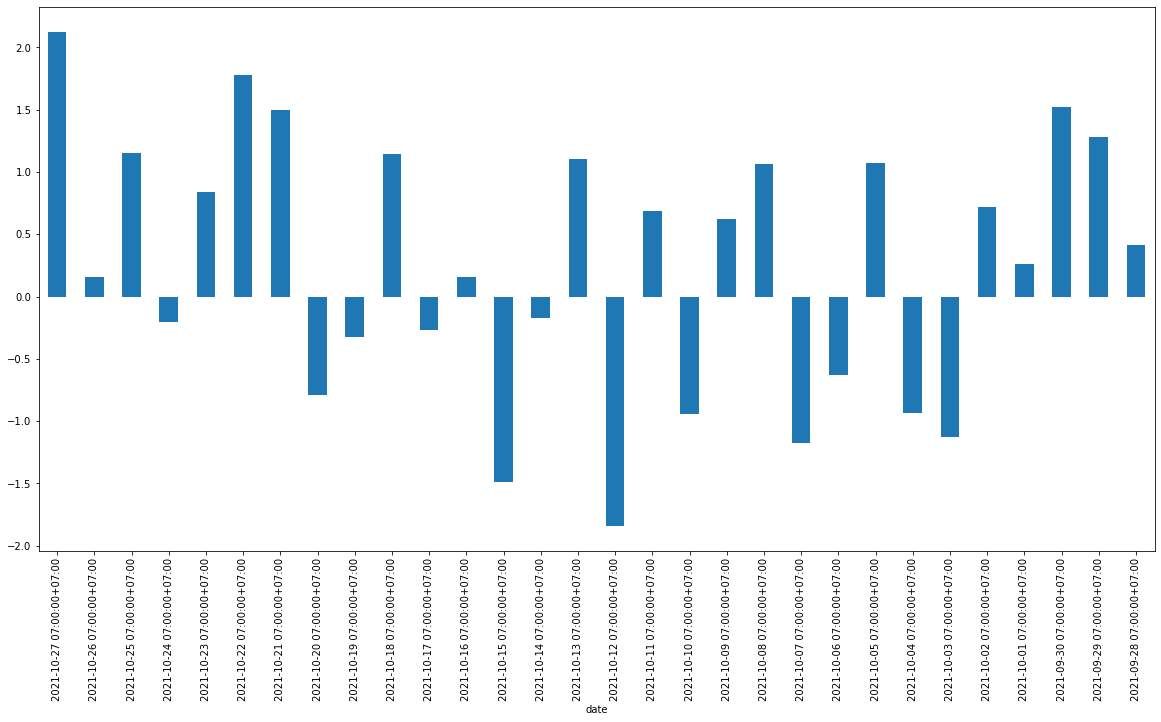

In [119]:
hour_observe = 7

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_x[data_prices_x['type'] == 'up']['hour_return'].describe())
print("+++")
print(data_prices_x[data_prices_x['type'] == 'down']['hour_return'].describe())
data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')
# data_prices[data_prices['hour'] == hour_observe]['hour_return'].hist(bins=20)

In [ ]:
data_prices[data_prices['hour_return']==data_prices['hour_return'].max()]


In [28]:
def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()



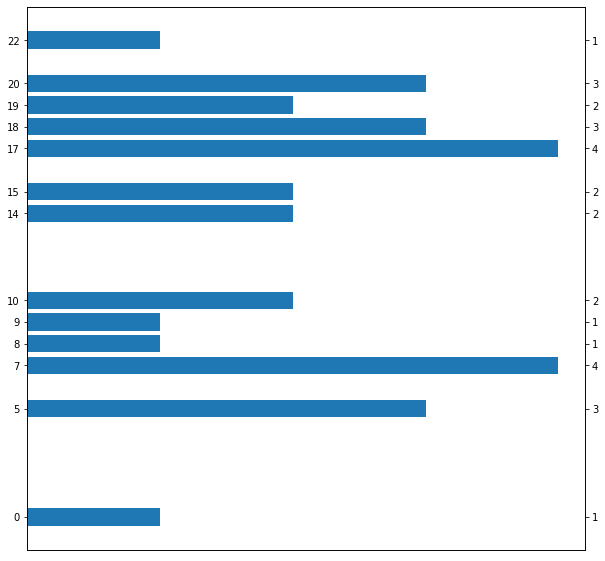

In [84]:

list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()




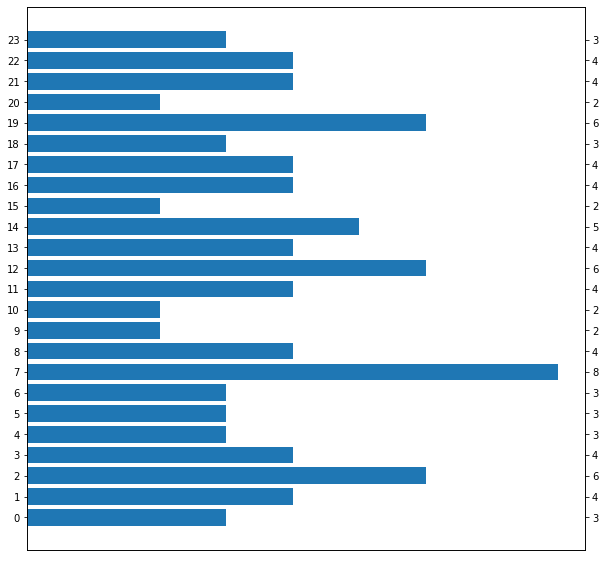

In [87]:
hour_observe = 7
type_observe = 'down'

data_prices_h7 = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == type_observe)]

hour_correlate = {
    '0': 0,
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0,
    '10': 0,
    '11': 0,
    '12': 0,
    '13': 0,
    '14': 0,
    '15': 0,
    '16': 0,
    '17': 0,
    '18': 0,
    '19': 0,
    '20': 0,
    '21': 0,
    '22': 0,
    '23': 0
}

for value in data_prices_h7['day'].to_list():
    for i in np.arange(24):
        if i == hour_observe:
            continue;
        hour_type = data_prices[(data_prices['day']  == value) & (data_prices['hour'] == i)].type

        if hour_type.values.size > 0 and hour_type.values == [type_observe]:
            hour_correlate[f"{i}"] = hour_correlate[f"{i}"] + 1
            
hour_correlate[f"{hour_observe}"] = len(data_prices_h7)

list_hours = [int(hour) for hour in hour_correlate.keys()]
list_correlate = hour_correlate.values()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_correlate, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_correlate)

plt.show()

